<a href="https://colab.research.google.com/github/Pablopooo/EDA_FundamentosML_PabloRiquelme/blob/main/Evaluacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Los Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
#Subida de archivos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep="\t")
df.head(10)

Saving marketing_campaign.csv to marketing_campaign (3).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [25]:
#Saber el nombre de las columnas
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [26]:
#La informacion del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [31]:
#Estaddticas descriptivas
print(df.describe())


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

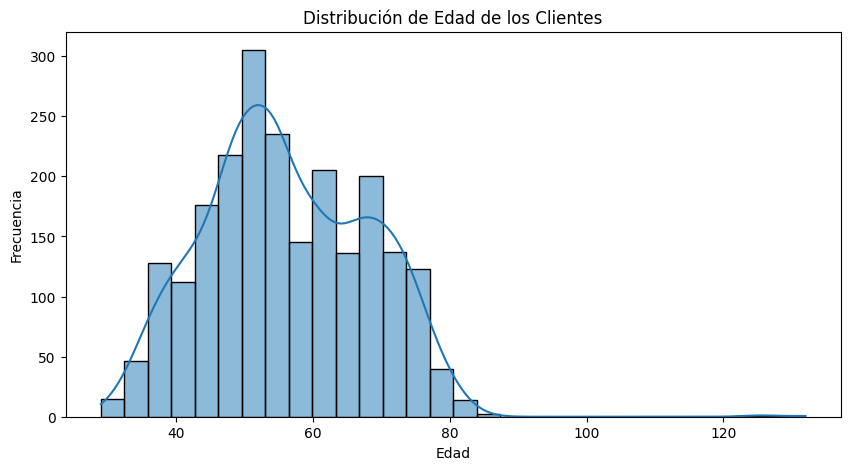

In [44]:
# Creando una columna para la edad
from datetime import datetime
current_year = datetime.now().year
df['Edad'] = current_year - df['Year_Birth']

# Histograma de para la edad
plt.figure(figsize=(10, 5))
sns.histplot(df['Edad'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

EXPLICACION DEL GRAFICO DEL ESTADO Civil
Se puede apreciar que la mayoria de los clientes se encuentran casados o conviviendo, mientras que los viudos son la minoria en este aspecto

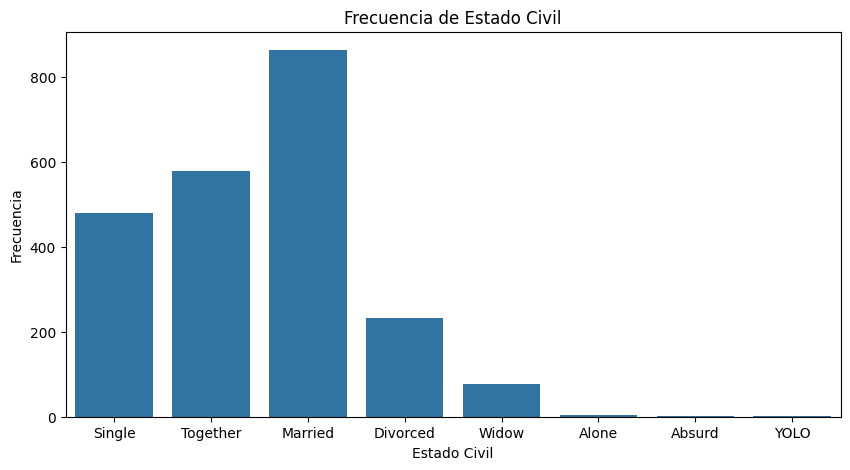

In [45]:
# Gráfico de barras para estado civil
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Marital_Status')
plt.title('Frecuencia de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()



EXPLICACION DEL GRAFICO DEL ESTADO Civil
Se puede apreciar que la mayoria de los clientes se encuentran casados o conviviendo, mientras que los viudos son la minoria en este aspecto

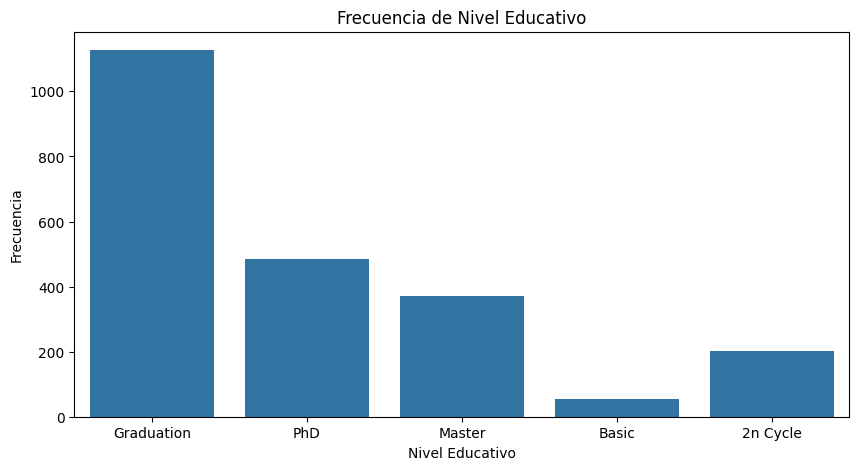

In [46]:
# Gráfico de barras para nivel educativo
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education')
plt.title('Frecuencia de Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.show()

ANALISIS DE GRAFICO DE NIVEL EDUCATIVO
Se puede apreciar que la mayoria de los clientes tienen un nivel educativo de grado universitario, seguido de posgrado y secundario.

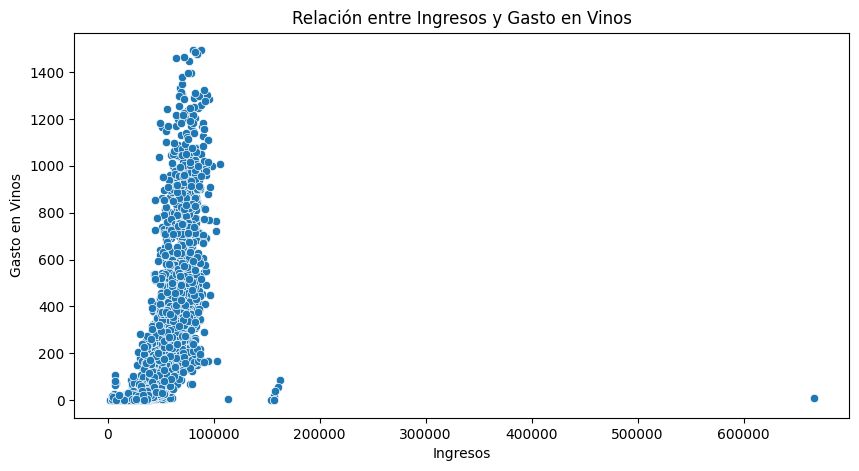

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income', y='MntWines')
plt.title('Relación entre Ingresos y Gasto en Vinos')
plt.xlabel('Ingresos')
plt.ylabel('Gasto en Vinos')
plt.show()


EXPLICACION DE GRAFICO DE RELACION ENTRE INGRESOS Y GASTO EN VINOS
Se puede apreciar que existe una relacion positiva entre los ingresos y el gasto en vinos, es decir que es más posible que alguien con más ingresos compre vino


In [58]:
# Selección de variables numéricas
variables = ['Income', 'Recency']

central_tendency_df = pd.DataFrame({
    'Media': df[variables].mean(),
    'Mediana': df[variables].median(),
    'Desviación Estándar': df[variables].std(),
    'Rango': df[variables].max() - df[variables].min()
})

# Mostrar la tabla
print(central_tendency_df)

                Media  Mediana  Desviación Estándar     Rango
Income   52237.975446  51381.5         25037.955891  664936.0
Recency     49.109375     49.0            28.962453      99.0


EXPLICACION DE LA TABLA DE ESTADISTICAS DESCRIPTIVAS
Se puede apreciar que la media de ingresos es de 52247.25, la mediana de ingresos es de 51381.50, la desviación estándar de ingresos es de 251

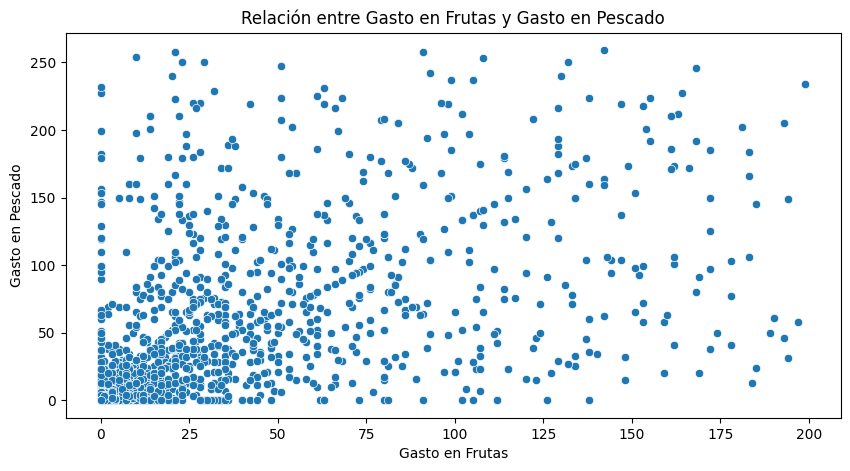

In [47]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MntFruits', y='MntFishProducts')
plt.title('Relación entre Gasto en Frutas y Gasto en Pescado')
plt.xlabel('Gasto en Frutas')
plt.ylabel('Gasto en Pescado')
plt.show()

EXPLICACION

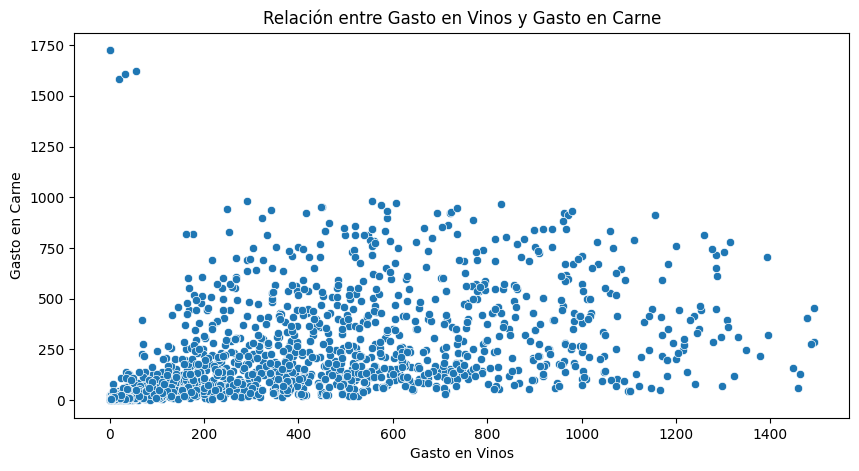

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='MntWines', y='MntMeatProducts')
plt.title('Relación entre Gasto en Vinos y Gasto en Carne')
plt.xlabel('Gasto en Vinos')
plt.ylabel('Gasto en Carne')
plt.show()

VINOS Y CARNE
Se puede apreciar que existe una relacion muy dispersa por lo que no hay tanta relacion entre el gasto en vino y carne, pero se puede apreciar que la mayoria gasta entre 0 a 800 en vino y muy pocos con bajo gasto en vino gasta en carne.

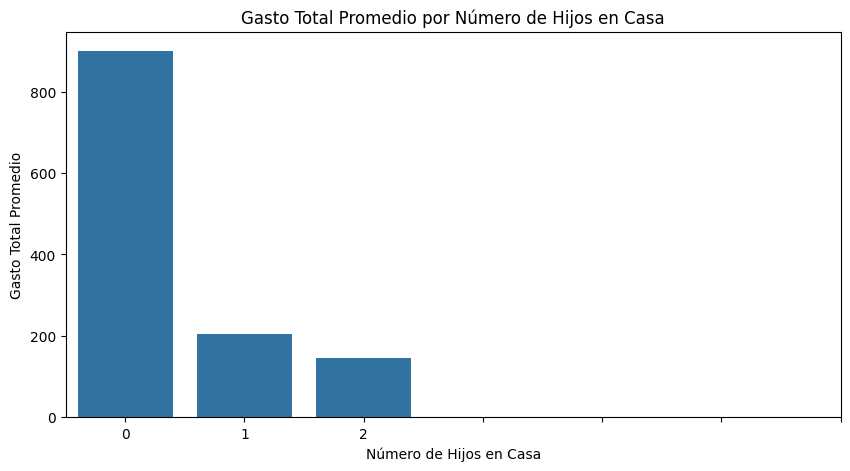

In [53]:
# Calcular el gasto total promedio por número de hijos en casa
kidhome_spending = df.groupby('Kidhome')['TotalMnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=kidhome_spending, x='Kidhome', y='TotalMnt')
plt.title('Gasto total promedio por número de hijos en Casa')
plt.xlabel('Número de Hijos en Casa')
plt.ylabel('Gasto Total Promedio')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.show()

EXPLICACIÓN DEL GRAFICO DE HIJOS EN CASA
SEPUEDE APRECIAR QUE SE GASTA MAYOR CANTIDAD DE DINERO EN CARNE, FRUTAS, PESCADO, ETC, CUANDO NO SE TIENEN HIJOS,

In [57]:
print("Asimetría de la edad:", df['Age'].skew())
print("Curtosis de la edad:", df['Age'].kurtosis())

Asimetría de la edad: 0.34994385918267057
Curtosis de la edad: 0.717464442459125


EXPLICACION DE LA ASIMETRIA Y CURTOSIS DE LA EDAD
La asimetría de la edad es negativa, lo que indica que la distribución de la edad está sesgada hacia la izquierda, lo que indica qu hay más clientes jóvenes que clientes mas adultos

Desafío:

Analizar el comportamiento de diferentes perfiles de clientes y buscar patrones de consumo asociados a variables demográficas y a la respuesta a las campañas de marketing.

RESPUESTA: Se puede concluir que la mayoria de los clientes rondan los 50 años, a medida que más dinero ganan están mas dispuestos a gastar en la carne, vino, pescado y frutas, pero esto se reduce considerablemente si es que tienen hijos, ya que a tener hijos unio puede concluir que ven esos gastos como menos necesarios.
El marketing se deberia ambientar más para el lado del adulto soltero para potenciar las ganancias generales.